In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
data = pd.read_csv("../Data_final/demo_and_housing.csv", index_col=0)
data = data.select_dtypes(include='number')
data.insert(0, 'price', data.pop('price'))
data

,price,year_built,is_new_construction,beds,baths,baths_beds_ratio,garage,lot_size,building_size,population,...,hhi_200k_or_more,race_and_ethnicity_total,population_density_sq_mi,median_age,educational_attainment_bachelors,educational_attainment_graduate,family_poverty_pct,unemployment_pct,housing_units,median_value_of_owner_occupied_units
zipcode,,,,,,,,,,,,,,,,,,,,,
90001,570000,1906,0,3,2.0,0.6667,3,7057,1756,3966936,...,97,59832,17090.0,29.1,0.048,0.008,0.2329,0.087,14174,359000
90001,470000,1913,0,3,1.5,0.5000,1,5721,1030,3966936,...,97,59832,17090.0,29.1,0.048,0.008,0.2329,0.087,14174,359000
90001,830000,1938,0,3,2.0,0.6667,2,5495,2503,3966936,...,97,59832,17090.0,29.1,0.048,0.008,0.2329,0.087,14174,359000
90001,400000,1905,0,4,2.0,0.5000,2,5387,1248,3966936,...,97,59832,17090.0,29.1,0.048,0.008,0.2329,0.087,14174,359000
90001,659000,1912,0,5,2.0,0.4000,2,5667,1897,3966936,...,97,59832,17090.0,29.1,0.048,0.008,0.2329,0.087,14174,359000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96003,275000,2006,0,3,2.5,0.8333,2,2614,1430,91580,...,844,44328,186.6,40.8,0.172,0.082,0.1121,0.050,19871,262000
96003,899000,1972,0,3,2.0,0.6667,2,1146783,3550,91580,...,844,44328,186.6,40.8,0.172,0.082,0.1121,0.050,19871,262000
96003,483500,1977,0,3,2.0,0.6667,5,89734,2552,91580,...,844,44328,186.6,40.8,0.172,0.082,0.1121,0.050,19871,262000


In [3]:
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values
X

array([[1.9060e+03, 0.0000e+00, 3.0000e+00, ..., 8.7000e-02, 1.4174e+04,
        3.5900e+05],
       [1.9130e+03, 0.0000e+00, 3.0000e+00, ..., 8.7000e-02, 1.4174e+04,
        3.5900e+05],
       [1.9380e+03, 0.0000e+00, 3.0000e+00, ..., 8.7000e-02, 1.4174e+04,
        3.5900e+05],
       ...,
       [1.9770e+03, 0.0000e+00, 3.0000e+00, ..., 5.0000e-02, 1.9871e+04,
        2.6200e+05],
       [1.9840e+03, 0.0000e+00, 4.0000e+00, ..., 5.0000e-02, 1.9871e+04,
        2.6200e+05],
       [1.9720e+03, 0.0000e+00, 3.0000e+00, ..., 5.0000e-02, 1.9871e+04,
        2.6200e+05]])

In [4]:
y

array([570000, 470000, 830000, ..., 483500, 345000, 105000])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [6]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
neighbors = np.arange(1, 11)
train_rmse = np.empty(len(neighbors))
test_rmse = np.empty(len(neighbors))
  

for i, k in enumerate(neighbors):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
      
    # Compute traning and test data accuracy
    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)
    train_error = sqrt(mean_squared_error(y_train, train_pred))
    test_error = sqrt(mean_squared_error(y_test,test_pred))
    train_rmse[i] = train_error
    test_rmse[i] = test_error
    print(k)
    print('train rmse is: ' + str(train_error))
    print('test rmse is: ' + str(test_error))
    

1
train rmse is: 62368.1709537411
test rmse is: 6771386.605162876
2
train rmse is: 3696954.5476981085
test rmse is: 3775563.71645978
3
train rmse is: 4323304.298448067
test rmse is: 2939239.6373804375
4
train rmse is: 4411372.600653694
test rmse is: 2473892.848595409
5
train rmse is: 4546531.491609646
test rmse is: 2607741.7448088885
6
train rmse is: 4750879.784191351
test rmse is: 2382807.074730814
7
train rmse is: 4852234.752663922
test rmse is: 2533108.9227899876
8
train rmse is: 4907469.34259636
test rmse is: 2589220.769751822
9
train rmse is: 4945441.8491722
test rmse is: 2541612.179375136
10
train rmse is: 5011646.229830002
test rmse is: 2417305.883302834


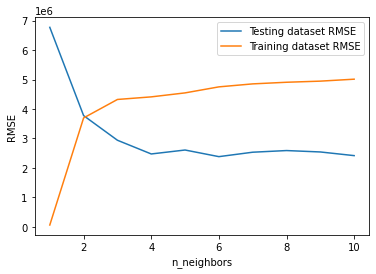

In [8]:
plt.plot(neighbors, test_rmse, label = 'Testing dataset RMSE')
plt.plot(neighbors, train_rmse, label = 'Training dataset RMSE')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('RMSE')
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
regr = LinearRegression()
  
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.05084934292710619


ValueError: x and y must be the same size

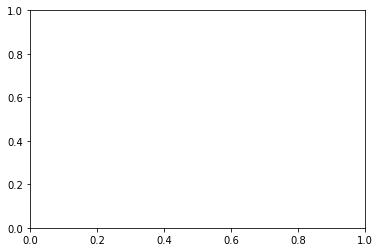

In [11]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
  
plt.show()

In [12]:
train_error = sqrt(mean_squared_error(y_train, regr.predict(X_train)))
print(train_error)

5773288.276904627


In [13]:
test_error = sqrt(mean_squared_error(y_test, regr.predict(X_test)))
print(test_error)

2867080.8103812733


In [14]:
from sklearn.ensemble import RandomForestRegressor

In [15]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [16]:
rf.fit(X_train, y_train)
print(rf.score(X_test, y_test))

0.34664434151845114


In [17]:
train_error = sqrt(mean_squared_error(y_train, rf.predict(X_train)))
print(train_error)

2120455.9218328954


In [18]:
test_error = sqrt(mean_squared_error(y_test, rf.predict(X_test)))
print(test_error)

2378741.1524209487
